In [1]:
#Imported all require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

In [2]:
# read csv dataset as dataframe
df = pd.read_csv('cryptos.csv')
df

,Unnamed: 0,Crypto,Date,Open,High,Low,Close,Volume,Market Cap
0,0,Binance,28-02-2021,225.445941,228.173046,195.852670,209.574404,3.129699e+09,3.238612e+10
1,1,Binance,27-02-2021,221.980905,237.179435,220.099401,225.249443,2.755271e+09,3.480842e+10
2,2,Binance,26-02-2021,235.270287,238.755012,210.310761,221.680429,4.167146e+09,3.425689e+10
3,3,Binance,25-02-2021,254.467606,264.705134,233.885956,233.885956,4.059853e+09,3.614305e+10
4,4,Binance,24-02-2021,231.121604,280.088196,214.524714,254.359132,7.154122e+09,3.930683e+10
...,...,...,...,...,...,...,...,...,...
19126,2761,XRP,08-08-2013,0.004397,0.004424,0.004175,0.004254,0.000000e+00,3.325863e+07
19127,2762,XRP,07-08-2013,0.004669,0.004682,0.004333,0.004417,0.000000e+00,3.453412e+07
19128,2763,XRP,06-08-2013,0.005637,0.005661,0.004629,0.004680,0.000000e+00,3.659101e+07
19129,2764,XRP,05-08-2013,0.005875,0.005980,0.005613,0.005613,0.000000e+00,4.387916e+07


In [3]:
# change the date format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
# date after which all the cryptos have equal amount of data available
specific_date = '2017-09-30 00:00:00'  

In [5]:
# filter the dataset with the specific date 
df = df[df['Date'] > specific_date]

In [6]:
# columns of the dataset
df = df[['Date','Crypto', 'Open', 'High', 'Low', 'Close', 'Volume','Market Cap']]

In [7]:
df

,Date,Crypto,Open,High,Low,Close,Volume,Market Cap
0,2021-02-28,Binance,225.445941,228.173046,195.852670,209.574404,3.129699e+09,3.238612e+10
1,2021-02-27,Binance,221.980905,237.179435,220.099401,225.249443,2.755271e+09,3.480842e+10
2,2021-02-26,Binance,235.270287,238.755012,210.310761,221.680429,4.167146e+09,3.425689e+10
3,2021-02-25,Binance,254.467606,264.705134,233.885956,233.885956,4.059853e+09,3.614305e+10
4,2021-02-24,Binance,231.121604,280.088196,214.524714,254.359132,7.154122e+09,3.930683e+10
...,...,...,...,...,...,...,...,...
17607,2017-10-05,XRP,0.215583,0.241023,0.215583,0.237016,4.042990e+08,9.088104e+09
17608,2017-10-04,XRP,0.203218,0.217024,0.202647,0.214774,1.235730e+08,8.235260e+09
17609,2017-10-03,XRP,0.203209,0.204808,0.198730,0.203318,4.870310e+07,7.795993e+09
17610,2017-10-02,XRP,0.206077,0.206556,0.199444,0.202676,7.741230e+07,7.771376e+09


In [8]:
# Convert string crypto into numeric data
le = preprocessing.LabelEncoder()
df['Crypto'] = le.fit_transform(df['Crypto'])

In [9]:
open_mean = df['Open']
close_mean = df['Close']
high_mean = df['High']
low_mean = df['Low']
# Compute the average of the open, close and high, low
open_close_avg = (df['Open'] + df['Close']) / 2
high_low_avg = (df['High'] + df['Low']) / 2

In [10]:
#The percentage of open-close mean 
open_close = (open_mean/close_mean * 100) - 100

In [11]:
# The percentage of high and low mean
high_low = (high_mean/low_mean * 100) - 100

In [12]:
# Create a new dataframe
new_df = df[['Date','Crypto', 'Volume','Market Cap']]
# rename the Market Cap column as MarketCap
new_df = new_df.rename(columns = {"Market Cap": "MarketCap"})

In [13]:
# Add Open-close and high-low percentage columns to the new_df dataframe
new_df['OpenClose'] = open_close
new_df['HighLow'] = high_low
new_df['AvgPrice'] = open_close_avg
new_df['AvgValue'] = high_low_avg

In [14]:
#Contains all unique dates 
dates = new_df['Date'].unique()

In [15]:
# create a new dataframe check
check = pd.DataFrame()

In [16]:
# Compute the percentage of Marketcap and Volume and add that data to the check dataframe
for i in range(len(dates)):
    data = new_df[new_df['Date'] == dates[i]]
    # sum of the marketcap and volume
    sum_mc = np.sum(data['MarketCap'])
    sum_vol = np.sum(data['Volume'])
    
    #data['VM Ratio'] = data['Volume'] / data['Market Cap']
    # percentage of marketcap and volume
    data['MarketCap'] = data['MarketCap'] / sum_mc * 100
    data['Volume'] = data['Volume'] / sum_vol * 100
    
    check = pd.concat([check, data])

In [17]:
check

,Date,Crypto,Volume,MarketCap,OpenClose,HighLow,AvgPrice,AvgValue
0,2021-02-28,0,1.389866,2.716893,7.573223,16.502392,217.510173,212.012858
1315,2021-02-28,1,23.733861,70.588028,2.340049,8.035806,45665.893410,44979.024610
4179,2021-02-28,2,6.986660,3.414095,1.189515,16.724383,1.315839,1.263603
5426,2021-02-28,3,0.896995,0.848326,6.364030,15.942324,25.448330,24.914530
6684,2021-02-28,4,12.273309,13.644850,3.093928,12.912187,1437.954670,1384.431813
...,...,...,...,...,...,...,...,...
7930,2017-10-01,4,16.644267,25.264011,-0.261301,2.756036,301.942001,299.126999
9963,2017-10-01,5,5.445965,2.554226,1.087025,2.865071,54.839750,54.393398
13020,2017-10-01,7,0.083407,0.199908,0.913177,3.598702,0.013751,0.013623
15420,2017-10-01,8,5.599478,0.384778,-0.265821,0.721311,0.998595,0.998581


In [18]:
# group check dataframe by crypto
group_crypto = check.groupby('Crypto')

In [19]:
# Compute the mean of OpenClose, HighLow, MarketCap, Volume columns of the group_crypto dataframe 
crypto_oc = group_crypto['OpenClose'].agg(np.mean)
#crypto_close = group_crypto['Close'].agg(np.mean)
crypto_hl = group_crypto['HighLow'].agg(np.mean)
#crypto_low = group_crypto['Low'].agg(np.mean)
crypto_mc = group_crypto['MarketCap'].agg(np.mean)
crypto_vol = group_crypto['Volume'].agg(np.mean)
crypto_price = group_crypto['AvgPrice'].agg(np.mean)
crypto_val = group_crypto['AvgValue'].agg(np.mean)
#crypto_vm = group_crypto['VM Ratio'].agg(np.mean)

In [20]:
# create a new dataframe for all the mean values
group_df = pd.DataFrame()
group_df['Cryptos'] = check['Crypto'].unique()
group_df['OpenClose'] = crypto_oc
group_df['HighLow'] = crypto_hl
group_df['MarketCap'] = crypto_mc
group_df['Volume'] = crypto_vol
group_df['AvgPrice'] = crypto_price
group_df['AvgValue'] = crypto_val
#group_df['VM Ratio'] = crypto_vm

In [21]:
group_df

,Cryptos,OpenClose,HighLow,MarketCap,Volume,AvgPrice,AvgValue
0,0,-0.155370,8.359344,1.071488,0.458698,20.108256,20.046732
1,1,-0.095923,5.240957,69.258139,40.248561,10233.025952,10211.626710
2,2,-0.068914,9.769008,1.255743,0.624465,0.139109,0.138511
3,3,-0.013277,11.815212,0.416654,0.407971,3.872744,3.863103
4,4,0.027188,6.739537,14.808482,15.635820,384.796917,383.593620
5,5,0.082176,7.558739,2.099740,4.438660,84.402682,84.228363
6,6,-0.945874,11.859125,1.220109,0.819865,9.507749,9.464062
7,7,-0.016895,9.442883,1.271531,0.604632,0.155657,0.155433
8,8,-0.001160,1.649235,2.132482,33.630384,1.002293,1.002913
9,9,0.151228,7.894376,7.496903,3.823917,0.410927,0.410520


In [22]:
#The group_df dataframe contains 10 rows, each row refers to each crypto currency data.
binance, bitcoin, cardano, chainLink, ethereum, liteCoin, polkadots, stellar, tether, xrp = [], [], [], [], [], [], [], [], [], []
for i in range(len(group_df.columns)):
    binance.append(group_df.iloc[0,i])
    bitcoin.append(group_df.iloc[1,i])
    cardano.append(group_df.iloc[2,i])
    chainLink.append(group_df.iloc[3,i])
    ethereum.append(group_df.iloc[4,i])
    liteCoin.append(group_df.iloc[5,i])
    polkadots.append(group_df.iloc[6,i])
    stellar.append(group_df.iloc[7,i])
    tether.append(group_df.iloc[8,i])
    xrp.append(group_df.iloc[9,i])
group_df

,Cryptos,OpenClose,HighLow,MarketCap,Volume,AvgPrice,AvgValue
0,0,-0.155370,8.359344,1.071488,0.458698,20.108256,20.046732
1,1,-0.095923,5.240957,69.258139,40.248561,10233.025952,10211.626710
2,2,-0.068914,9.769008,1.255743,0.624465,0.139109,0.138511
3,3,-0.013277,11.815212,0.416654,0.407971,3.872744,3.863103
4,4,0.027188,6.739537,14.808482,15.635820,384.796917,383.593620
5,5,0.082176,7.558739,2.099740,4.438660,84.402682,84.228363
6,6,-0.945874,11.859125,1.220109,0.819865,9.507749,9.464062
7,7,-0.016895,9.442883,1.271531,0.604632,0.155657,0.155433
8,8,-0.001160,1.649235,2.132482,33.630384,1.002293,1.002913
9,9,0.151228,7.894376,7.496903,3.823917,0.410927,0.410520


In [23]:
# transfrom cryptos as columns and attributes as rows
group_df_rev = pd.DataFrame({
    "Binance": [binance[1], binance[2], binance[3], binance[4], binance[5], binance[6]],
    "Bitcoin": [bitcoin[1], bitcoin[2], bitcoin[3], bitcoin[4], bitcoin[5], bitcoin[6]],
    "Cardano": [cardano[1], cardano[2], cardano[3], cardano[4], cardano[5], cardano[6]],
    "ChainLink": [chainLink[1], chainLink[2], chainLink[3], chainLink[4], chainLink[5], chainLink[6]],
    "Ethereum": [ethereum[1], ethereum[2], ethereum[3], ethereum[4], ethereum[5], ethereum[6]],
    "Litecoin": [liteCoin[1], liteCoin[2], liteCoin[3], liteCoin[4], liteCoin[5], liteCoin[6]],
    "Polkadot": [polkadots[1], polkadots[2], polkadots[3], polkadots[4], polkadots[5], polkadots[6]],
    "Stellar": [stellar[1], stellar[2], stellar[3], stellar[4], stellar[5], stellar[6]],
    "Tether": [tether[1], tether[2], tether[3], tether[4], tether[5], tether[6]],
    "XRP": [xrp[1], xrp[2], xrp[3], xrp[4], xrp[5], xrp[6]]
})

group_df_rev = group_df_rev.rename(index={0: 'OpenClose', 1: 'HighLow', 2:'MarketCap', 3:'Volume', 4:'AvgPrice', 5:'AvgValue'})

In [24]:
# List of cyptos
cryptos = ['Binance', 'Bitcoin', 'Cardano', 'ChainLink', 'Ethereum', 'Litecoin', 'Polkadot', 'Stellar', 'Tether', 'XRP']
#df1 = final_df[final_df['Date'] > '2020-03-20 00:00:00']
x = check['Date'].unique()

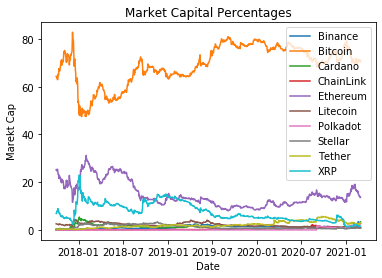

In [25]:
# The graph between market capital percentage and the date with respect to all crypto currencies.
#for i in range(2, len(cryptos)):
for i in range(0, len(cryptos)):
    plt_data = check[check['Crypto'] == i]
    y = plt_data['MarketCap']
    j = len(y)
    
    while j != len(x):
        y[j] = np.min(plt_data['MarketCap'])
        j += 1
    
    plt.plot(x, y, label = cryptos[i])

plt.xlabel('Date')
plt.ylabel('Marekt Cap')
plt.title('Market Capital Percentages')
plt.legend()
plt.rcParams["figure.figsize"] = (20, 25)
plt.show()

**Interpretation :** As shown in the line graph above, the Bitcoin has the highest market capital value and then followed by ethereum and XRP. Initially, the bitcoin value was low, it kept increasing gradually with some fluctuations. The Etherium and XRP graph is high initially, and later those coins values also started decreasing.After Jan-2020, etherium market capital value gradually increases and XRP value decreases. At certain period of time, the XRP market capital value was higher than the Etherium. By this we can say that the market capital of Bitcoin and XRP,Etherium has influence on each other negitively at certain point. Usually, the higher market capital is consider as the safe investment. Therefore, a suggestion that the plot is giving is that our main choices could come from either bitcoin, etherium, litecoin or XRP, since they have relatively high market capital.

The market capital value of the remaining coins is almost equivalent to 0 and might be negligible.

In [26]:
group_df

,Cryptos,OpenClose,HighLow,MarketCap,Volume,AvgPrice,AvgValue
0,0,-0.155370,8.359344,1.071488,0.458698,20.108256,20.046732
1,1,-0.095923,5.240957,69.258139,40.248561,10233.025952,10211.626710
2,2,-0.068914,9.769008,1.255743,0.624465,0.139109,0.138511
3,3,-0.013277,11.815212,0.416654,0.407971,3.872744,3.863103
4,4,0.027188,6.739537,14.808482,15.635820,384.796917,383.593620
5,5,0.082176,7.558739,2.099740,4.438660,84.402682,84.228363
6,6,-0.945874,11.859125,1.220109,0.819865,9.507749,9.464062
7,7,-0.016895,9.442883,1.271531,0.604632,0.155657,0.155433
8,8,-0.001160,1.649235,2.132482,33.630384,1.002293,1.002913
9,9,0.151228,7.894376,7.496903,3.823917,0.410927,0.410520


In [27]:
group_df_rev

,Binance,Bitcoin,Cardano,ChainLink,Ethereum,Litecoin,Polkadot,Stellar,Tether,XRP
OpenClose,-0.155370,-0.095923,-0.068914,-0.013277,0.027188,0.082176,-0.945874,-0.016895,-0.001160,0.151228
HighLow,8.359344,5.240957,9.769008,11.815212,6.739537,7.558739,11.859125,9.442883,1.649235,7.894376
MarketCap,1.071488,69.258139,1.255743,0.416654,14.808482,2.099740,1.220109,1.271531,2.132482,7.496903
Volume,0.458698,40.248561,0.624465,0.407971,15.635820,4.438660,0.819865,0.604632,33.630384,3.823917
AvgPrice,20.108256,10233.025952,0.139109,3.872744,384.796917,84.402682,9.507749,0.155657,1.002293,0.410927
AvgValue,20.046732,10211.626710,0.138511,3.863103,383.593620,84.228363,9.464062,0.155433,1.002913,0.410520


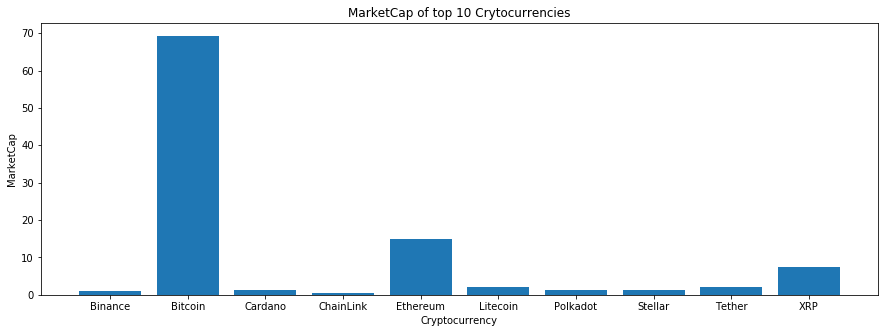

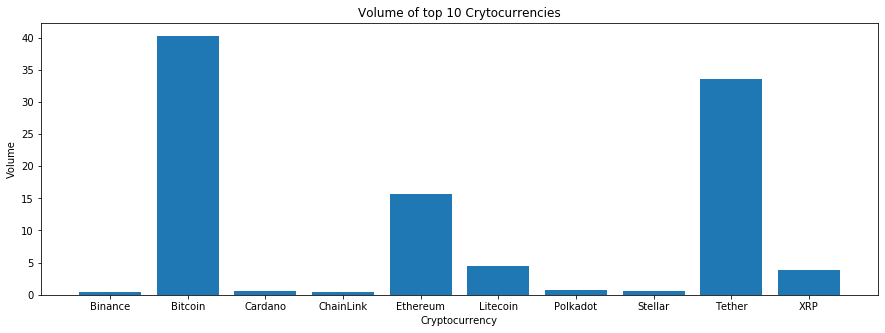

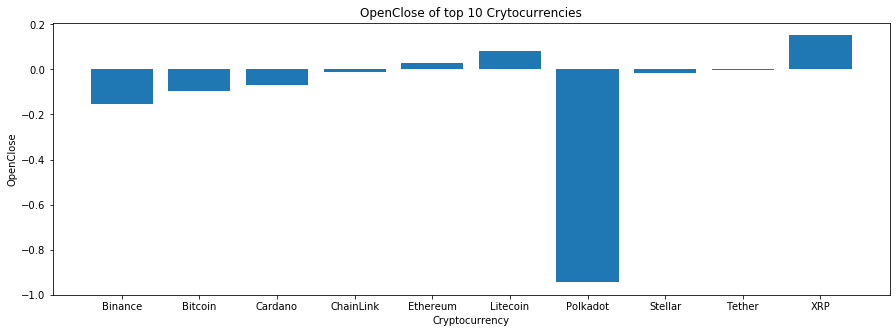

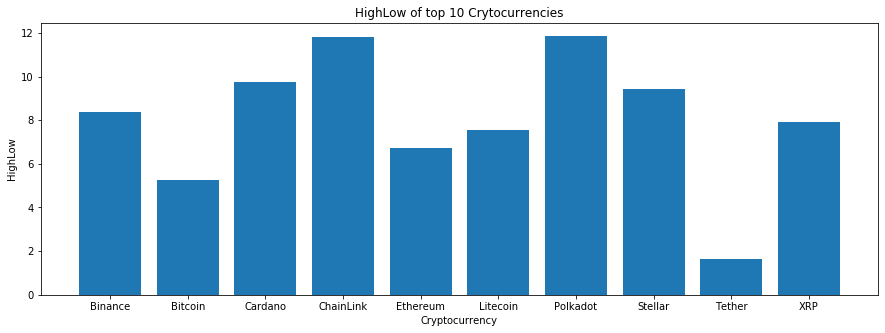

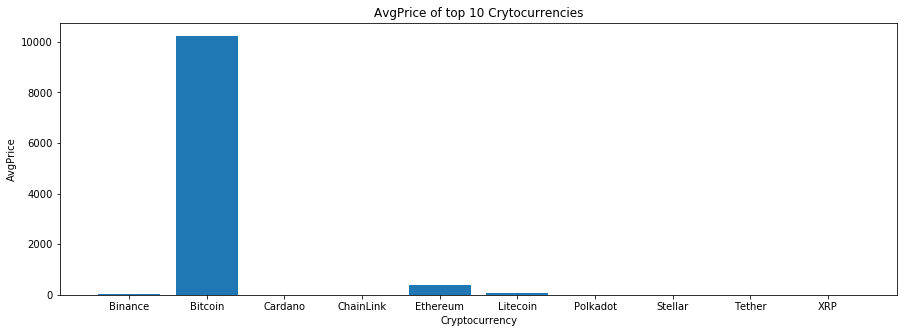

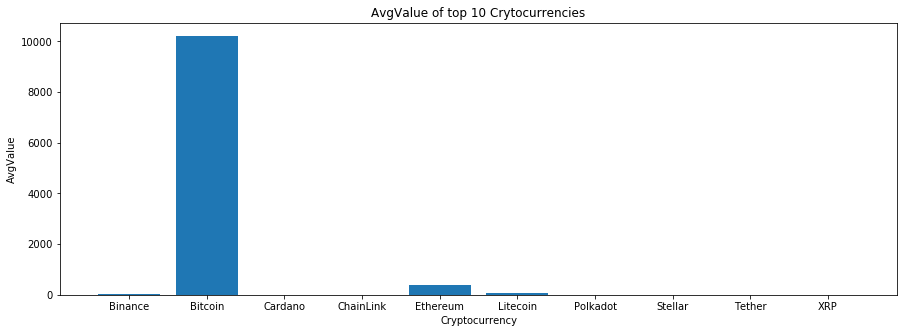

In [28]:
strings = ['MarketCap', 'Volume', 'OpenClose', 'HighLow', 'AvgPrice', 'AvgValue']
# The plot between 'Market cap', 'Volume', 'OpenClose', 'Highlow', 'AvgPrice' and 'AvgValue' of top 10 cryptocurrencies
for i in range(len(group_df.columns) - 1):
    string = strings[i] + ' of top 10 Crytocurrencies'
    plt.rcParams["figure.figsize"] = (15, 5)
    plt.bar(cryptos, group_df[strings[i]])
    plt.title(string)
    plt.xlabel('Cryptocurrency')
    plt.ylabel(strings[i])
    plt.show()

**Interpretation:** As discussed in the above, Bitcoin, Ethereum and XRP has the highest market capital values. The volume of the bitcoin is higher since it has higher market capital which means it is very safe to invest, most of the trader choose to buy bitcoin. And then followed by Tether because the price of tether is just 1$ and it is easily convertable to any other coins.and next followed by Etherium, Litecoin and the XRP. The volume of the cryptocurrencies explains the amount of the currency traded the crypto coin in 24 hours.

The percentages of open and close graph shows that all cryptocurriences have the negative values except the XRP, Ethereum, litecoin and Tether. Tether is positive because the value of tether is always 1$.This is because on average the other coins' closeing prices are lower than the opening prices.

The graph about the percentages of the high and low differences shows how much the prices fluctuate. We can observe that tether has the lowest flctuation and thus relatively more constant in price than the other coins.Bitcoin, Ethereum and litecoin follows after tether. Polkadot and Chainlink have the highest fluctuation and thus have relatively low constant price. 
 
The average of open and close prices and the average of high and low prices correspond to the average price and thus are similar. Bitcoin is leading price-wise followed by etherium and litecoin.


In [29]:
# The correlation matrix of different crypto currencies
cor_matrix = group_df_rev.corr()
cor_matrix

,Binance,Bitcoin,Cardano,ChainLink,Ethereum,Litecoin,Polkadot,Stellar,Tether,XRP
Binance,1.000000,0.946619,-0.052517,0.395586,0.945581,0.961907,0.811341,-0.054612,-0.400876,-0.434077
Bitcoin,0.946619,1.000000,-0.371616,0.079667,0.999676,0.998173,0.580406,-0.373563,-0.323525,-0.630101
Cardano,-0.052517,-0.371616,1.000000,0.892070,-0.373426,-0.321780,0.538969,0.999984,-0.148124,0.705174
ChainLink,0.395586,0.079667,0.892070,1.000000,0.075972,0.132042,0.851615,0.890954,-0.308452,0.401291
Ethereum,0.945581,0.999676,-0.373426,0.075972,1.000000,0.998272,0.579664,-0.375426,-0.307488,-0.619000
Litecoin,0.961907,0.998173,-0.321780,0.132042,0.998272,1.000000,0.623711,-0.323909,-0.312089,-0.599272
Polkadot,0.811341,0.580406,0.538969,0.851615,0.579664,0.623711,1.000000,0.537002,-0.382907,0.061090
Stellar,-0.054612,-0.373563,0.999984,0.890954,-0.375426,-0.323909,0.537002,1.000000,-0.151808,0.706668
Tether,-0.400876,-0.323525,-0.148124,-0.308452,-0.307488,-0.312089,-0.382907,-0.151808,1.000000,0.107349
XRP,-0.434077,-0.630101,0.705174,0.401291,-0.619000,-0.599272,0.061090,0.706668,0.107349,1.000000


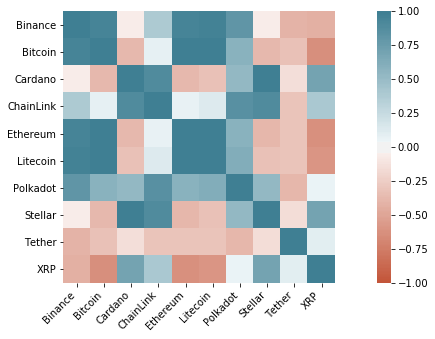

In [30]:
# The visualization of cryptocurrencies correlation matrix
heat_corr = sns.heatmap(
                        cor_matrix,
                        vmin = -1,
                        vmax = 1,
                        center = 0,
                        cmap = sns.diverging_palette(20,220,n=200),
                        square = True)

heat_corr.set_xticklabels(heat_corr.get_xticklabels(),
                         rotation = 45,
                         horizontalalignment = 'right'
                         );
#NOTE: The dark color represents the high correlation between two cryptos and light color represents the less/no correlation between cryptos.

The more the score of correlation is towards the green color the higher the positive correlation of two coins, and the more it is towards the red color the more negatively correlated the two coins are. As shown in the matrix above, XRP,Tether, Stellar and Cardano are negatively correlated to bitcoin and that means for example, as XRP value increases, bitcoin value decreases and vice versa. Bitcoin has a strong correlation with Binance, Ethereum and the Litecoin. The stronger correlation indicates that as bitcoin increases, XRP also increases.
In comparision between bitcoin and etherium, for most of the coins if bitcoin has the negative correlation, then etherium also has the negative correlation or less correlation with the same coin. 

In [31]:
features = check.columns

print("R-Squared values")
print("--------------------")

for i in range(len(features)):
    if features[i] != 'MarketCap':
        x = "MarketCap ~ " + features[i]
        market_cap = sm.ols(formula = x, data = check).fit()
        print(features[i], ": ", market_cap.rsquared * 100, '%')

R-Squared values
--------------------
Date :  0.03868042569861174 %
Crypto :  11.976091302898284 %
Volume :  45.53674406741146 %
OpenClose :  0.001986433551492972 %
HighLow :  1.239854606530788 %
AvgPrice :  58.920624210878515 %
AvgValue :  59.08163652824962 %


The linear model is fit to predict the Market capital values given the attributes i.e date, Crypto, Volume, the average price, the average value, the percentage of the difference between open and close prices, and the percentage of the difference between high and low prices.  

The R-squared value of the average price and value is around 59%, which means the avg price and value correspond 59% of the model's prediction of market capital. The R-squared value of volume is 45.5%. It is less than the Average price and value. Thus,the volume doesn't correspond to the prediction as much as the average price and average value. The remaining attributes' R-squared values are low. Therefore they don't have major influence on the market capital prediction.


In [32]:
features = group_df_rev.columns

print("R-Squared values")
print("--------------------")

for i in range(len(features)):
    if features[i] != 'Bitcoin':
        x = "Bitcoin ~ " + features[i]
        btc = sm.ols(formula = x, data = group_df_rev).fit()
        print(features[i], ": ", btc.rsquared * 100, '%')

R-Squared values
--------------------
Binance :  89.60869375292889 %
Cardano :  13.809838272741503 %
ChainLink :  0.6346846941667983 %
Ethereum :  99.93521436285647 %
Litecoin :  99.63498431042287 %
Polkadot :  33.68710623891806 %
Stellar :  13.954938331960765 %
Tether :  10.466822412459853 %
XRP :  39.702687891101775 %


The linear model is fit to predict the bitcoin given the other crypto currencies. The R-squared values are computed for each crypto currency.

The R-squared values of Ethereum, Litecoin and Binance are high, which means that ethereum, litcoin and binance correspond more to the prediction of bitcoin's rank. But on the otherhand, Cardano, ChainLink,Polkadot, Stellar, Tether and XRP have lower R-squared values. Therefore, these coins influence the prediction of bitcoin's rank less. 

In [33]:
# fit the linear regression model to observe how ethereum values effects bitcoin values
# The linear regression model is Bitcoin = beta_0 + beta_1*Ethereum
single_model = sm.ols(formula = "Bitcoin ~ Ethereum", data = group_df_rev).fit()
single_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6170.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.57e-07
Time:                        03:06:19   Log-Likelihood:                -37.353
No. Observations:                   6   AIC:                             78.71
Df Residuals:                       4   BIC:                             78.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -221.5556     76.792     -2.885      0.045    -434.764      -8.347
Ethereum      27.1706      0.346     78.551      0.000      26.210      28.131
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.943
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.304
Skew:                           0.466   Prob(JB):                        0.859
Kurtosis:                       2.412   Cond. No.                         279.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As discussed above, the R-squared value of the Etherium model is 0.99, which means that the model explains 99% of the variablity in bitcoin's rank.

The fit linear regression model is 

Bitcoin = beta_0 + beta_1*Ethereum. 

Bitcoin = -221.5556 + 27.1706*Ethereum.

where beta_0 is the intercept and beta_1 is the coeffient of the etherium. 

beta_1 = 27.1706, the coeffienct of the etherium is positive, which means that if ethereum increases by 1 unit then bitcoin increases by 27.1706 units.

beta_0 = -221.5556, The intercept is negative, which says that etherium decreases by 221.5556 for every one unit change in the bitcoin. [NOT SURE?]


In [34]:
model_data = group_df_rev[['Binance', 'Bitcoin', 'Cardano', 'ChainLink', 'Ethereum', 'Litecoin', 'Polkadot', 'Stellar', 'Tether', 'XRP']]
# fit the linear regression model to observe how ethereum and chainlink values effects bitcoin values
#The linear regression model is Bitcoin = beta_0 + beta_1* Ethereum + beta_2*ChainLink
multi_model = sm.ols(formula = "Bitcoin ~ XRP + Tether + Cardano", data = model_data).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                 -0.341
Method:                 Least Squares   F-statistic:                    0.5765
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.684
Time:                        03:06:19   Log-Likelihood:                -57.509
No. Observations:                   6   AIC:                             123.0
Df Residuals:                       2   BIC:                             122.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7055.3506   3717.767      1.898      0.198   -8940.912    2.31e+04
XRP         -910.1065   1113.493     -0.817      0.500   -5701.082    3880.869
Tether       -99.7041    217.768     -0.458      0.692   -1036.682     837.274
Cardano       44.7183   1053.757      0.042      0.970   -4489.232    4578.669
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.819
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.810
Skew:                          -0.897   Prob(JB):                        0.667
Kurtosis:                       2.864   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of the XRP, Tether and Cardano is 0.464, which means that these features explain 46% of the variablity in bitcoin. This model is used to examine how bitcoin varies with a change in XRP and tether. 

The fit linear regression model is 

Bitcoin = beta_0 + beta_1*XRP + beta_2*Tether + beta_3*Cardano. 
Bitcoin = 7055.3506 -910.1065*XRP - 99.7041*Tether + 44.7183 * Cardano.
where beta_0 is the intercept, beta_1,beta_2, beta_3 are the coeffient of the XRP, Tether and Cardano respectively. 

beta_1, beta_2 are negative, that means the XRP and Tether decreases 910 and 99.7 units if bitcoin increases one unit. and beta_3 is positive so the relation between Cardano and bitcoin is directly propotional to some extent.

beta_0 = 7055.3506, The intercept is positive, which says that XRP,Tether and Cardano increases by  7055.3506 for every one unit change in the bitcoin. [NOT SURE? ]

In [77]:
#check['Date'] = check['Date'].map(dt.datetime.toordinal)
# Convert date values into numeric
check['Date'] = le.fit_transform(check['Date'])

In [36]:
x = check[['Date', 'Crypto', 'Volume', 'OpenClose', 'HighLow', 'AvgPrice', 'AvgValue']]
y = check['MarketCap']

In [37]:
x1 = check[['Date', 'Crypto', 'MarketCap', 'Volume', 'OpenClose', 'HighLow', 'AvgValue']]
y1 = check['AvgPrice']

In [38]:
# Split the dataset into the train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [39]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.33, random_state = 0)

In [40]:
# Fit the regression model on training set and test the data on testing set
model_LR = LinearRegression().fit(x_train, y_train)
y_pred_LR = model_LR.predict(x_test)

intercept_LR = model_LR.intercept_
coef_LR = model_LR.coef_
# accuracy of train and test set
score_train_LR = model_LR.score(x_train, y_train)
score_test_LR = model_LR.score(x_test, y_test)

In [41]:
print('Linear Regression Results: ')
print('---------------------------------------')
#print('Intercept: ', intercept_LR)
#print('---------------------------------------')
#print('Coefficients: ')
#for i in range(len(x.columns)):
#    print('   ', x.columns[i], ': ', coef_LR[i])
#print('---------------------------------------')
print('Train score: ', score_train_LR)
print('---------------------------------------')
print('Test score: ', score_test_LR)

Linear Regression Results: 
---------------------------------------
Train score:  0.7503916505447871
---------------------------------------
Test score:  0.7491102010553992


In [42]:
# fit the gradient boosting regression model on train set 
model_GBR = GradientBoostingRegressor().fit(x_train, y_train)
# predict values on test set
y_pred_GBR = model_GBR.predict(x_test)
# compute the accuracy of train and test set
score_train_GBR = model_GBR.score(x_train, y_train)
score_test_GBR = model_GBR.score(x_test, y_test)

In [43]:
print('Gradient Boosting Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_GBR)
print('---------------------------------------')
print('Test score: ', score_test_GBR)

Gradient Boosting Regression Results: 
---------------------------------------
Train score:  0.9979854325966744
---------------------------------------
Test score:  0.9976663854841097


In [44]:
# fit random forest regression model on train set
model_RFR = RandomForestRegressor().fit(x_train, y_train)
# predict the value on test set
y_pred_RFR = model_RFR.predict(x_test)
# compute the accuracy of train and test set
score_train_RFR = model_RFR.score(x_train, y_train)
score_test_RFR = model_RFR.score(x_test, y_test)

In [45]:
print('Random Forest Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_RFR)
print('---------------------------------------')
print('Test score: ', score_test_RFR)

Random Forest Regression Results: 
---------------------------------------
Train score:  0.9999344909672925
---------------------------------------
Test score:  0.9996853465503983


In [46]:
# fit ridge regression model on train set
model_R1 = Ridge(alpha = 10, fit_intercept = True)
model_R = model_R1.fit(x_train, y_train)
y_pred_R = model_R1.predict(x_test)
# compute the accuarcy of train and test set
score_train_R = model_R.score(x_train, y_train)
score_test_R = model_R.score(x_test, y_test)

In [47]:
print('Ridge Regression Results: ')
print('---------------------------------------')
# print the percentage of accuracy
print('Train score: ', score_train_R * 100)
print('---------------------------------------')
print('Test score: ', score_test_R * 100)

Ridge Regression Results: 
---------------------------------------
Train score:  75.03916495805522
---------------------------------------
Test score:  74.9111465585291


In [48]:
# fit the Lasso regression model on training set
model_L1 = Lasso(alpha = 10, max_iter = 100000, fit_intercept = True)
model_L = model_L1.fit(x_train, y_train)
y_pred_L = model_L1.predict(x_test)
# compute the accuracy of the train and test set
score_train_L = model_L.score(x_train, y_train)
score_test_L = model_L.score(x_test, y_test)

In [49]:
print('Lasso Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_L * 100)
print('---------------------------------------')
print('Test score: ', score_test_L * 100)

Lasso Regression Results: 
---------------------------------------
Train score:  71.83232510346485
---------------------------------------
Test score:  72.60912866412787


In [50]:
# Compare all acurracies of train and test sets of different regression models
indices = ['LR', 'GBR', 'RFR', 'R', 'L']
test_scores = [score_test_LR, score_test_GBR, score_test_RFR, score_test_R, score_test_L]
train_scores = [score_train_LR, score_train_GBR, score_train_RFR, score_train_R, score_train_L]

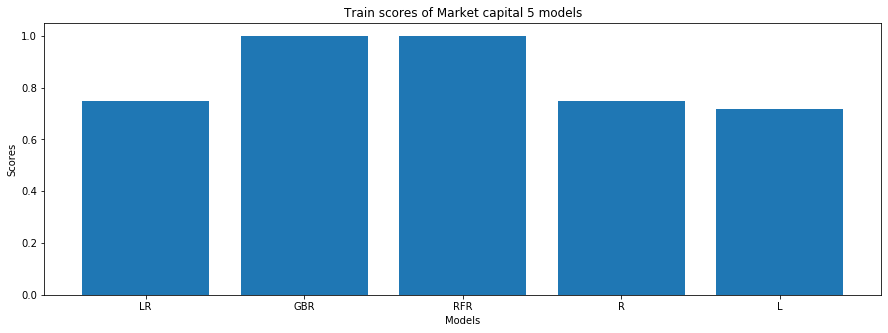

In [51]:
# Plot the train score of different regression models
plt.bar(indices, train_scores)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train scores of Market capital 5 models')
plt.show()

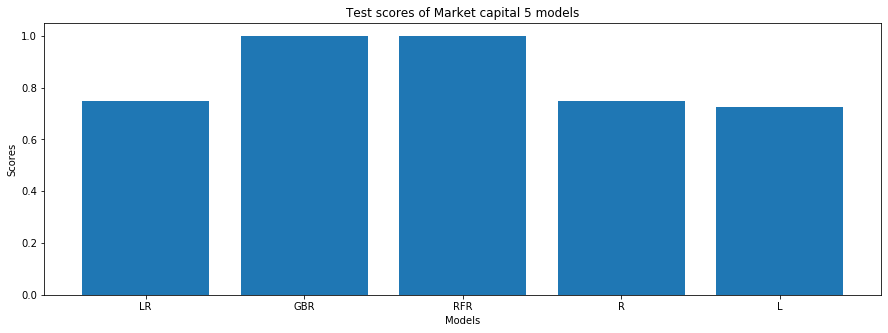

In [52]:
# Plot the test scores of different regression models
plt.bar(indices, test_scores)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Test scores of Market capital 5 models')
plt.show()

In [53]:
# Fit the regression model on training set and test the data on testing set
model_LR1 = LinearRegression().fit(x_train1, y_train1)
y_pred_LR1 = model_LR1.predict(x_test1)

intercept_LR1 = model_LR.intercept_
coef_LR1 = model_LR1.coef_
# accuracy of train and test set
score_train_LR1 = model_LR1.score(x_train1, y_train1)
score_test_LR1 = model_LR1.score(x_test1, y_test1)

In [54]:
print('Linear Regression Results: ')
print('---------------------------------------')
#print('Intercept: ', intercept_LR)
#print('---------------------------------------')
#print('Coefficients: ')
#for i in range(len(x.columns)):
#    print('   ', x.columns[i], ': ', coef_LR[i])
#print('---------------------------------------')
print('Train score: ', score_train_LR1)
print('---------------------------------------')
print('Test score: ', score_test_LR1)

Linear Regression Results: 
---------------------------------------
Train score:  0.9997942384200982
---------------------------------------
Test score:  0.999769140102484


In [55]:
# fit the gradient boosting regression model on train set 
model_GBR1 = GradientBoostingRegressor().fit(x_train1, y_train1)
# predict values on test set
y_pred_GBR1 = model_GBR1.predict(x_test1)
# compute the accuracy of train and test set
score_train_GBR1 = model_GBR1.score(x_train1, y_train1)
score_test_GBR1 = model_GBR1.score(x_test1, y_test1)

In [56]:
print('Gradient Boosting Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_GBR1)
print('---------------------------------------')
print('Test score: ', score_test_GBR1)

Gradient Boosting Regression Results: 
---------------------------------------
Train score:  0.9999615847818033
---------------------------------------
Test score:  0.9994043178932667


In [57]:
# fit random forest regression model on train set
model_RFR1 = RandomForestRegressor().fit(x_train1, y_train1)
# predict the value on test set
y_pred_RFR1 = model_RFR1.predict(x_test1)
# compute the accuracy of train and test set
score_train_RFR1 = model_RFR1.score(x_train1, y_train1)
score_test_RFR1 = model_RFR1.score(x_test1, y_test1)

In [58]:
print('Random Forest Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_RFR1)
print('---------------------------------------')
print('Test score: ', score_test_RFR1)

Random Forest Regression Results: 
---------------------------------------
Train score:  0.999918887522266
---------------------------------------
Test score:  0.9995443072869358


In [59]:
# fit ridge regression model on train set
model_R11 = Ridge(alpha = 10, fit_intercept = True)
model_R1 = model_R11.fit(x_train1, y_train1)
y_pred_R1 = model_R1.predict(x_test1)
# compute the accuarcy of train and test set
score_train_R1 = model_R1.score(x_train1, y_train1)
score_test_R1 = model_R1.score(x_test1, y_test1)

In [60]:
print('Ridge Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_R1)
print('---------------------------------------')
print('Test score: ', score_test_R1)

Ridge Regression Results: 
---------------------------------------
Train score:  0.9997942384200953
---------------------------------------
Test score:  0.9997691402267204


In [61]:
# fit the Lasso regression model on training set
model_L11 = Lasso(alpha = 10, max_iter = 100000, fit_intercept = True)
model_L1 = model_L11.fit(x_train1, y_train1)
y_pred_L1 = model_L1.predict(x_test1)
# compute the accuracy of the train and test set
score_train_L1 = model_L1.score(x_train1, y_train1)
score_test_L1 = model_L1.score(x_test1, y_test1)

In [62]:
print('Lasso Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_L1)
print('---------------------------------------')
print('Test score: ', score_test_L1)

Lasso Regression Results: 
---------------------------------------
Train score:  0.9997938586388211
---------------------------------------
Test score:  0.9997698611652569


In [63]:
# Market cap
result_mc = pd.DataFrame()
result_mc = x_test
result_mc['LR'] = y_pred_LR
result_mc['GBR'] = y_pred_GBR
result_mc['RFR'] = y_pred_RFR
result_mc['R'] = y_pred_R
result_mc['L'] = y_pred_L
result_mc['Average_MC_Pred'] = (y_pred_LR + y_pred_GBR + y_pred_RFR + y_pred_R + y_pred_L) / 5
result_mc['Date'] = le.inverse_transform(result_mc['Date'])
#result_mc['Crypto'] = le.inverse_transform(result_mc['Crypto'])
result_mc.sort_values(by=['Date'], inplace = True, ascending=False)

In [64]:
# Average price
result_price = pd.DataFrame()
result_price = x_test1
result_price['LR'] = y_pred_LR1
result_price['GBR'] = y_pred_GBR1
result_price['RFR'] = y_pred_RFR1
result_price['R'] = y_pred_R1
result_price['L'] = y_pred_L1
result_price['Average_Price_Pred'] = (y_pred_LR1 + y_pred_GBR1 + y_pred_RFR1 + y_pred_R1 + y_pred_L1) / 5
result_price['Date'] = le.inverse_transform(result_price['Date'])
#result_price['Crypto'] = le.inverse_transform(result_price['Crypto'])
result_price.sort_values(by=['Date'], inplace = True, ascending=False)

In [65]:
market_cap = pd.DataFrame()
avg_price = pd.DataFrame()

for i in range(len(cryptos)):
    data1 = result_mc[result_mc['Crypto'] == i]
    data2 = result_price[result_price['Crypto'] == i]
    
    for j in range(len(data1)):
        data1.iloc[j, 1] = cryptos[i]
        data2.iloc[j, 1] = cryptos[i]
    
    market_cap = pd.concat([market_cap, data1])
    avg_price = pd.concat([avg_price, data2])

In [66]:
# Compare all acurracies of train and test sets of different regression models
test_scores1 = [score_test_LR1, score_test_GBR1, score_test_RFR1, score_test_R1, score_test_L1]
train_scores1 = [score_train_LR1, score_train_GBR1, score_train_RFR1, score_train_R1, score_train_L1]

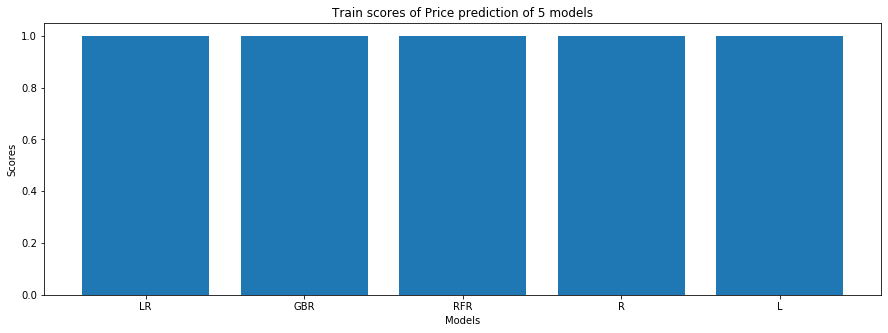

In [67]:
# Plot the train score of different regression models
plt.bar(indices, train_scores1)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train scores of Price prediction of 5 models')
plt.show()

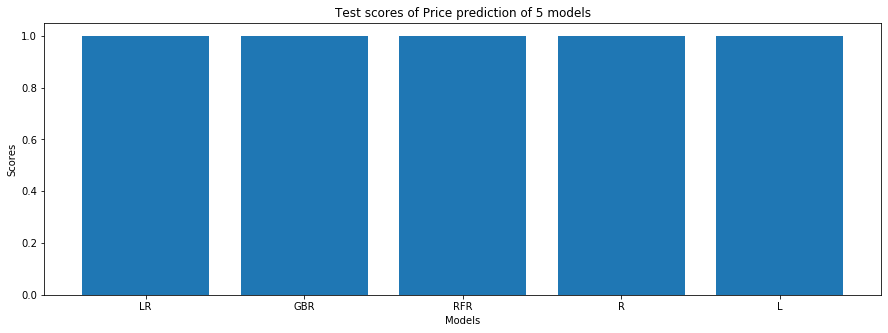

In [68]:
plt.bar(indices, test_scores1)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Test scores of Price prediction of 5 models')
plt.show()

The accuracy score for both training and testing price prediction dataset is similar for all five regression models. Hence, we can say that the score of predicting price is accurate.

In [69]:
# group check dataframe by crypto
group_mc = market_cap.groupby('Crypto')
group_mc_all = pd.DataFrame()

In [70]:
# Compute the mean of OpenClose, HighLow, MarketCap, Volume columns of the group_crypto dataframe 
cols = market_cap.columns
# ['Date', 'Crypto', 'Volume', 'OpenClose', 'HighLow', 'AvgPrice','AvgValue', 'LR', 
# 'GBR', 'RFR', 'R', 'L', 'Average_MC_Pred']
group_mc_all['Crypto'] = market_cap['Crypto'].unique()

for i in range(len(cols)):
    if cols[i] != 'Date' and cols[i] != 'Crypto':
        vals = group_mc[cols[i]].agg(np.mean)
        group_mc_all[cols[i]] = vals.values

In [71]:
# group check dataframe by crypto
group_price = avg_price.groupby('Crypto')
group_price_all = pd.DataFrame()

In [72]:
# Compute the mean of OpenClose, HighLow, MarketCap, Volume columns of the group_crypto dataframe 
cols = avg_price.columns
# ['Date', 'Crypto', 'Volume', 'OpenClose', 'HighLow', 'AvgPrice','AvgValue', 'LR', 
# 'GBR', 'RFR', 'R', 'L', 'Average_MC_Pred']
group_price_all['Crypto'] = avg_price['Crypto'].unique()

for i in range(len(cols)):
    if cols[i] != 'Date' and cols[i] != 'Crypto':
        vals = group_price[cols[i]].agg(np.mean)
        group_price_all[cols[i]] = vals.values

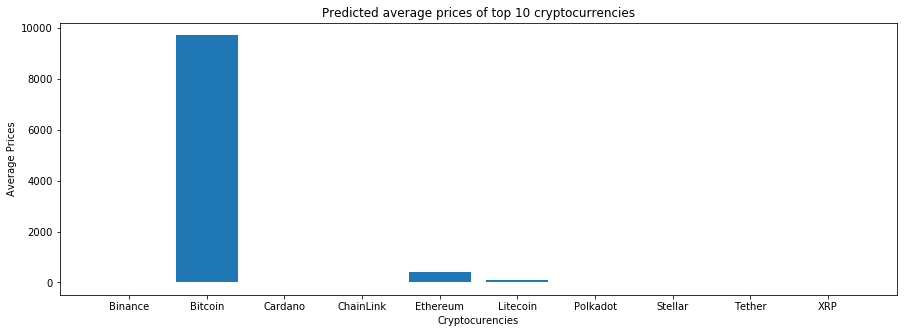

In [73]:
plt.bar(group_price_all['Crypto'], group_price_all['Average_Price_Pred'])
plt.xlabel('Cryptocurencies')
plt.ylabel('Average Prices')
plt.title('Predicted average prices of top 10 cryptocurrencies')
plt.show()

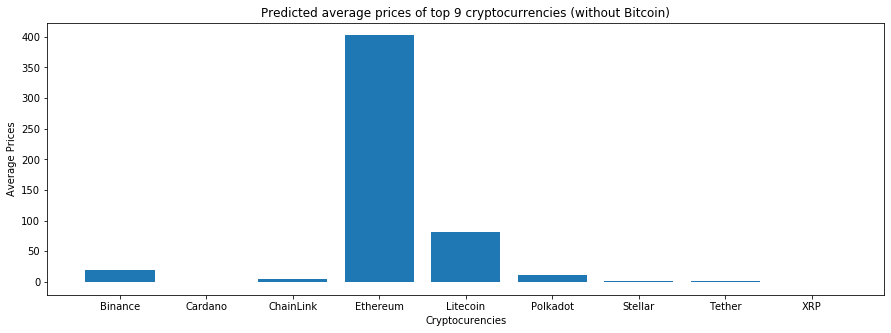

In [74]:
group_price_all = group_price_all[group_price_all['Crypto'] != 'Bitcoin']
plt.bar(group_price_all['Crypto'], group_price_all['Average_Price_Pred'])
plt.xlabel('Cryptocurencies')
plt.ylabel('Average Prices')
plt.title('Predicted average prices of top 9 cryptocurrencies (without Bitcoin)')
plt.show()

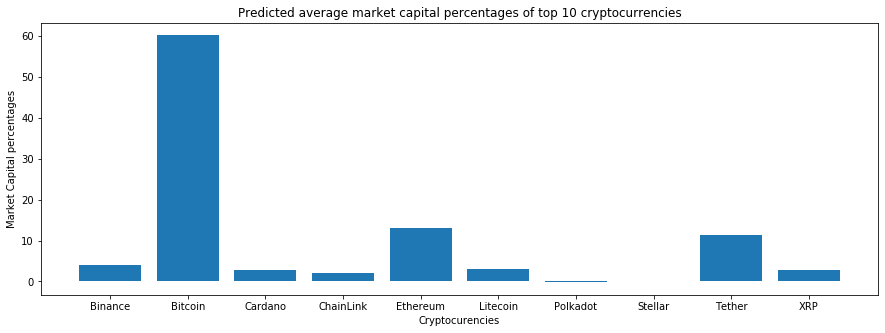

In [75]:
plt.bar(group_mc_all['Crypto'], group_mc_all['Average_MC_Pred'])
plt.xlabel('Cryptocurencies')
plt.ylabel('Market Capital percentages')
plt.title('Predicted average market capital percentages of top 10 cryptocurrencies')
plt.show()

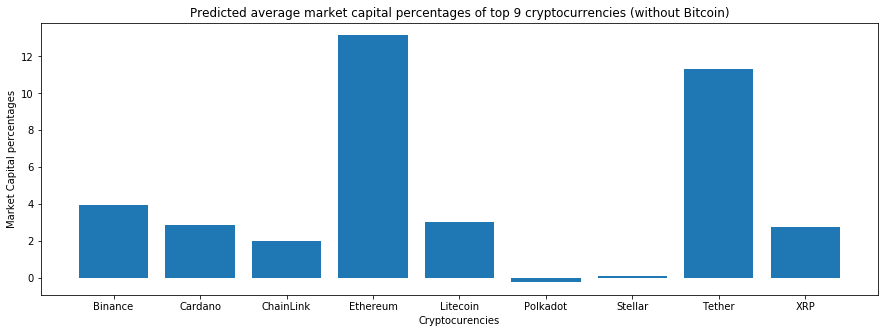

In [76]:
group_mc_all = group_mc_all[group_mc_all['Crypto'] != 'Bitcoin']
plt.bar(group_mc_all['Crypto'], group_mc_all['Average_MC_Pred'])
plt.xlabel('Cryptocurencies')
plt.ylabel('Market Capital percentages')
plt.title('Predicted average market capital percentages of top 9 cryptocurrencies (without Bitcoin)')
plt.show()